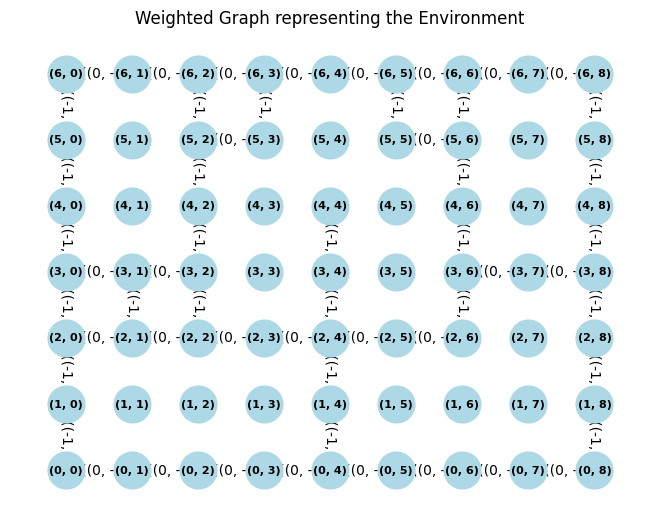

In [1]:
# Weighted Graph
import networkx as nx
import matplotlib.pyplot as plt

# Define the environment as a grid
board = [
    ['A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
    ['D', 'W', 'W', 'W', 'D', 'W', 'W', 'W', 'D'],
    ['D', 'w', 'D', 'D', 'D', 'D', 'D', 'W', 'D'],
    ['D', 'D', 'D', 'W', 'E', 'W', 'D', 'D', 'D'],
    ['D', 'W', 'D', 'W', 'G', 'W', 'D', 'W', 'D'],
    ['D', 'W', 'D', 'D', 'W', 'D', 'D', 'W', 'D'],
    ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
]

# Create a weighted graph
G = nx.Graph()

# Add vertices (nodes) representing each cell in the grid
for i in range(len(board)):
    for j in range(len(board[0])):
        G.add_node((i, j))

# Define actions and their corresponding rewards
actions = {
    (0, 1): 1,  # Up
    (0, -1): -1,  # Down
    (-1, 0): -1,  # Left
    (1, 0): -1  # Right
}

# Add edges representing actions with their corresponding rewards
for i in range(len(board)):
    for j in range(len(board[0])):
        if board[i][j] != 'W':  # Ignore walls
            for action, reward in actions.items():
                new_i, new_j = i + action[0], j + action[1]
                if (0 <= new_i < len(board) and 0 <= new_j < len(board[0]) and
                        board[new_i][new_j] != 'W'):  # Ensure not to go out of bounds or onto walls
                    G.add_edge((i, j), (new_i, new_j), weight=reward, action=action)

# Draw the graph
pos = {(i, j): (j, -i) for i in range(len(board)) for j in range(len(board[0]))}  # Position vertices
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=8, font_weight='bold')
edge_labels = {(u, v): f"{d['weight']} ({d['action']})" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph representing the Environment")
plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
plt.show()


In [2]:
# Q-Table
import numpy as np

# Define the dimensions of the grid
num_rows = 7
num_cols = 9
num_actions = 4  # Up, Down, Left, Right

# Initialize the Q-Table with zeros
q_table = np.zeros((num_rows, num_cols, num_actions))

# Display the Q-Table
print("Q-Table:")
print("State | Action: 0 (Up) | Action: 1 (Down) | Action: 2 (Left) | Action: 3 (Right)")
print("-" * 81)
for i in range(num_rows):
    for j in range(num_cols):
        row_str = f"({i},{j})  |"
        for k in range(num_actions):
            row_str += f"  q({i},{j},{k}): {q_table[i, j, k]:.2f}  |"
        print(row_str)

Q-Table:
State | Action: 0 (Up) | Action: 1 (Down) | Action: 2 (Left) | Action: 3 (Right)
---------------------------------------------------------------------------------
(0,0)  |  q(0,0,0): 0.00  |  q(0,0,1): 0.00  |  q(0,0,2): 0.00  |  q(0,0,3): 0.00  |
(0,1)  |  q(0,1,0): 0.00  |  q(0,1,1): 0.00  |  q(0,1,2): 0.00  |  q(0,1,3): 0.00  |
(0,2)  |  q(0,2,0): 0.00  |  q(0,2,1): 0.00  |  q(0,2,2): 0.00  |  q(0,2,3): 0.00  |
(0,3)  |  q(0,3,0): 0.00  |  q(0,3,1): 0.00  |  q(0,3,2): 0.00  |  q(0,3,3): 0.00  |
(0,4)  |  q(0,4,0): 0.00  |  q(0,4,1): 0.00  |  q(0,4,2): 0.00  |  q(0,4,3): 0.00  |
(0,5)  |  q(0,5,0): 0.00  |  q(0,5,1): 0.00  |  q(0,5,2): 0.00  |  q(0,5,3): 0.00  |
(0,6)  |  q(0,6,0): 0.00  |  q(0,6,1): 0.00  |  q(0,6,2): 0.00  |  q(0,6,3): 0.00  |
(0,7)  |  q(0,7,0): 0.00  |  q(0,7,1): 0.00  |  q(0,7,2): 0.00  |  q(0,7,3): 0.00  |
(0,8)  |  q(0,8,0): 0.00  |  q(0,8,1): 0.00  |  q(0,8,2): 0.00  |  q(0,8,3): 0.00  |
(1,0)  |  q(1,0,0): 0.00  |  q(1,0,1): 0.00  |  q(1,0,2): 0.00 